## Project : Behavioral Cloning with Deep Learning

Author : Mouad HADJI

## 1. Import packages

In [1]:
import os, sys

import csv
import cv2
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Convolution2D, Cropping2D
from keras.layers.pooling import MaxPooling2D

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
project_path = os.path.join(os.environ['HOME'], "sdcnd/behavioral_cloning")
utlis_path = os.path.join(project_path, "utils")
data_path = os.path.join(project_path, "data")

Below, we import our custom packaged called data_mungling

In [3]:
sys.path.insert(0, utlis_path)
from data_mungling import *

## 2. Load and Generate the data

In [4]:
left_paths, center_paths, right_paths, measurements = read_images(data_path)

In [5]:
image_paths, measurements = combine_measurements(left_paths, center_paths, right_paths, measurements, correction=0.2)

In [6]:
data = list(zip(image_paths, measurements))

Splitting samples and creating generators.

In [7]:
training_data, test_data = train_test_split(data, test_size=0.2)

In [8]:
print('Training examples count: {}'.format(len(training_data)))
print('Test examples count: {}'.format(len(test_data)))

Training examples count: 6144
Test examples count: 1536


In [10]:
train_generator = generate_data(training_data, batch_size=32)
test_generator = generate_data(test_data, batch_size=32)

## 3. Design and train model

In [19]:
def model():
    """
    Creates a model with pre-processing layers
    """
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((50,20), (0,0))))
    model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
    model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
    model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
    model.add(Convolution2D(64,3,3, activation='relu'))
    model.add(Convolution2D(64,3,3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
    return model

In [20]:
model = model()

In [21]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 160, 320, 3)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
cropping2d_2 (Cropping2D)        (None, 90, 320, 3)    0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 43, 158, 24)   1824        cropping2d_2[0][0]               
____________________________________________________________________________________________________
convolution2d_7 (Convolution2D)  (None, 20, 77, 36)    21636       convolution2d_6[0][0]            
___________________________________________________________________________________________

In [22]:
model.compile(loss='mse', optimizer='adam')

In [23]:
history_object = model.fit_generator(train_generator, samples_per_epoch= len(training_data),
                                     validation_data=test_generator, nb_val_samples=len(test_data),
                                     nb_epoch=4, verbose=1)

Epoch 1/4
6144/6144 [==============================] - 133s - loss: 0.0269 - val_loss: 0.0175
Epoch 2/4
6144/6144 [==============================] - 125s - loss: 0.0215 - val_loss: 0.0198
Epoch 3/4
6144/6144 [==============================] - 125s - loss: 0.0181 - val_loss: 0.0160
Epoch 4/4
6144/6144 [==============================] - 119s - loss: 0.0173 - val_loss: 0.0156


In [24]:
model.save(os.path.join(project_path, 'model.h5'))

In [25]:
print(history_object.history.keys())

dict_keys(['val_loss', 'loss'])


In [26]:
print('Loss')
print(history_object.history['loss'])

Loss
[0.026855527200192835, 0.021540081565035507, 0.018063095631077886, 0.017346682866142753]


In [27]:
print('Validation Loss')
print(history_object.history['val_loss'])

Validation Loss
[0.017524341295938939, 0.019790847126084071, 0.016002578001158934, 0.015577799562985698]


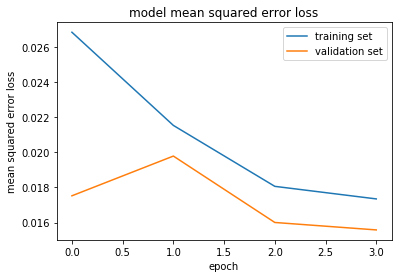

In [28]:
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()